In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (16, 10)

import wrangle

In [2]:
aquifer, temps, precip, pop, usage = wrangle.get_dataframes()

In [3]:
aquifer, weather, pop, usage = wrangle.clean_all_dataframes(aquifer, temps, precip, pop, usage)

In [4]:
aquifer.info(), weather.info(), pop.info(), usage.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31919 entries, 1932-11-12 to 2022-06-12
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   water_level_elevation  31919 non-null  float64
dtypes: float64(1)
memory usage: 498.7 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1529 entries, 1895-01-01 to 2022-05-01
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   avg_monthly_temp      1529 non-null   float64
 1   total_monthly_precip  1529 non-null   float64
dtypes: float64(2)
memory usage: 35.8 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38 entries, 1850-01-01 to 2022-01-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   population  38 non-null     int64
dtypes: int64(1)
memory usage: 608.0 bytes
<class 'pandas.core.frame.

(None, None, None, None)

### Univariate display of all data

since I have all numerical data I will be using describe and histplots

**Starting with Aquifer**

<AxesSubplot:ylabel='Frequency'>

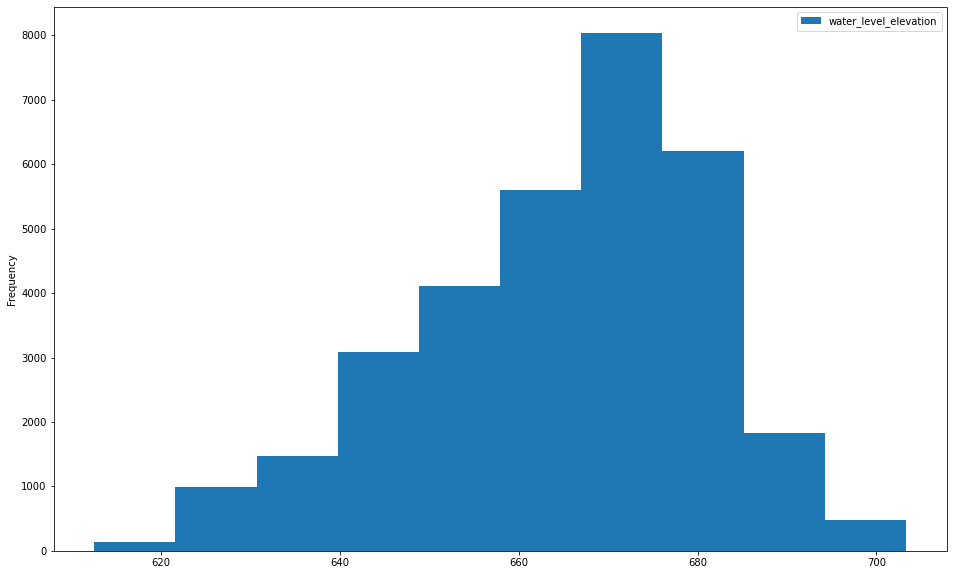

In [5]:
aquifer.plot(kind= 'hist')

In [6]:
aquifer.describe().T

,count,mean,std,min,25%,50%,75%,max
water_level_elevation,31919.0,664.944913,16.189777,612.51,654.25,667.67,676.57,703.31


Main aquifer dataset is relatively normal with some left skew.

**Moving to weather**

<AxesSubplot:ylabel='Frequency'>

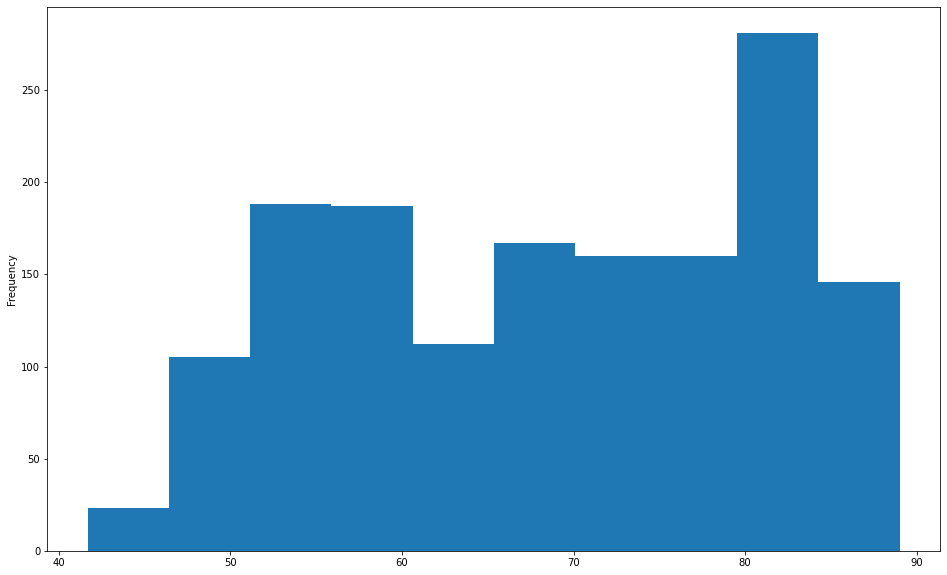

In [7]:
weather.avg_monthly_temp.plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

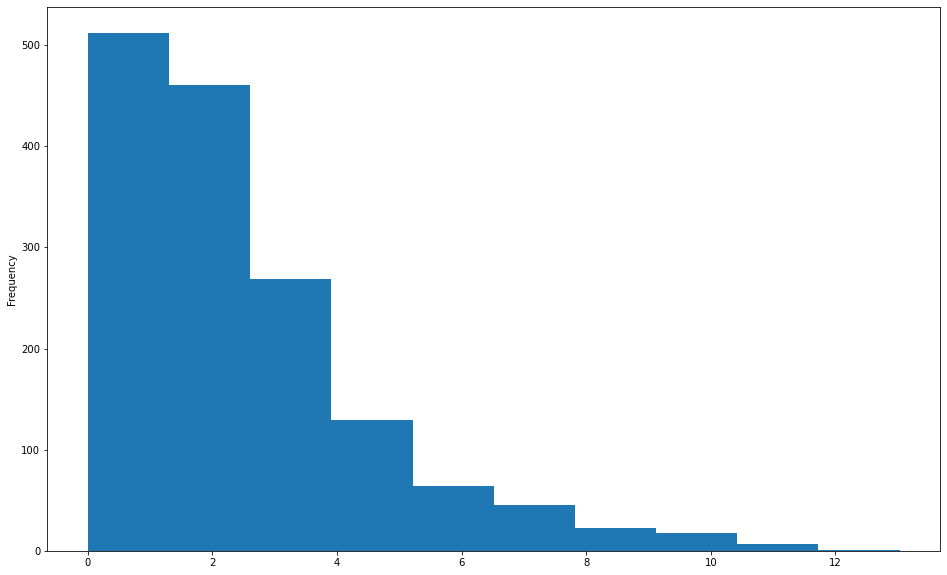

In [8]:
weather.total_monthly_precip.plot(kind = 'hist')

In [9]:
weather.describe().T

,count,mean,std,min,25%,50%,75%,max
avg_monthly_temp,1529.0,68.675932,12.233472,41.7,57.20,69.5,80.40,89.00
total_monthly_precip,1529.0,2.479922,2.088409,0.0,0.97,2.0,3.36,13.03


Temp is somewhat uniform with a spike in the 80s and precipitation is hard right skewed with most data coming in around 0-2

**Visualizing population**

<AxesSubplot:ylabel='Frequency'>

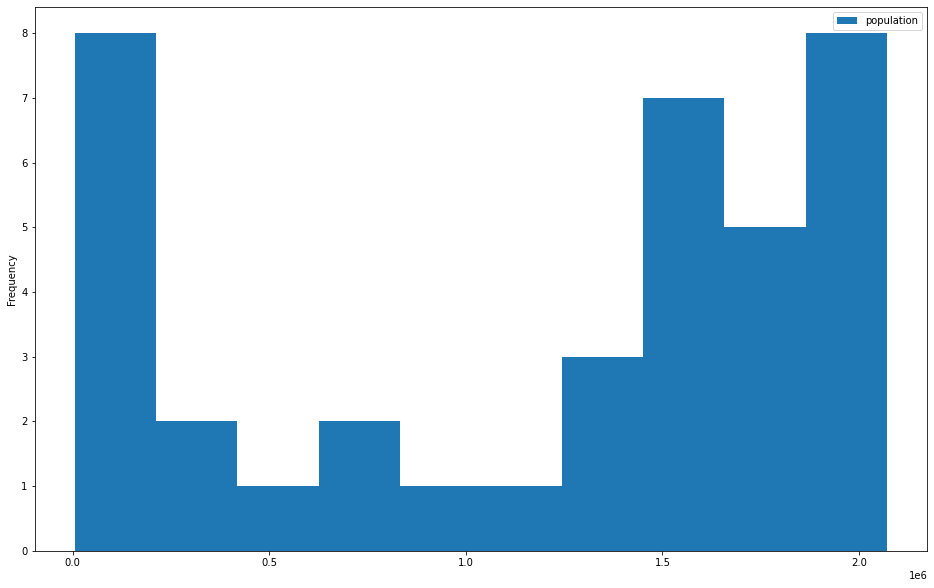

In [10]:
pop.plot(kind = 'hist')

I realized this data isn't exactly "right" as I have population as a change in decade up to 2000 after which it's by year. So I need to resample to 10 years and plot again to see actual distribution.

<AxesSubplot:ylabel='Frequency'>

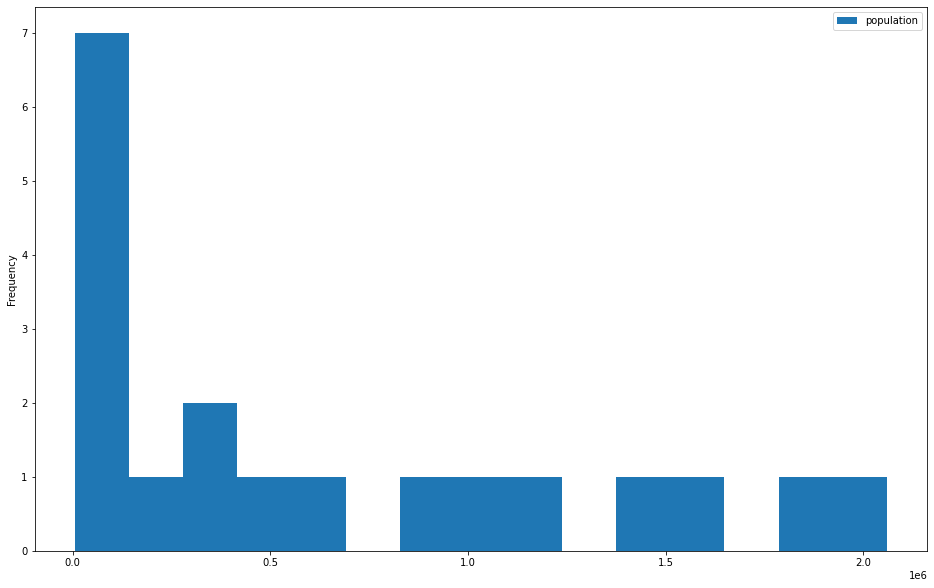

In [19]:
# I'm also changing the bins here
pop.resample('10Y').mean().plot(kind='hist', bins = 15)

In [17]:
pop.resample('10Y').mean().describe().T

,count,mean,std,min,25%,50%,75%,max
population,19.0,643587.526316,681896.876231,6052.0,59344.0,338176.0,1087095.0,2059475.0


This data would be better represented as a lineplot which I will do after finishing all histograms.

In [21]:
usage.head()

,population,municipal,manufacturing,mining,power,irrigation,livestock,municipal_ground_water,municipal_surface_water,municipal_reuse,...,power_ground_water,power_surface_water,power_reuse,irrigation_ground_water,irrigation_surface_water,irrigation_reuse,livestock_ground_water,livestock_surface_water,livestock_reuse,total_consumption
date,,,,,,,,,,,,,,,,,,,,,
1984-01-01,NaN,252584,11445,259,33106,40347,1635,252273,311,NaN,...,1300,31806,NaN,23489,16858,NaN,162,1473,NaN,339376
1985-01-01,NaN,231034,12516,2763,27438,29411,1390,230794,240,NaN,...,1974,25464,NaN,16967,12444,NaN,138,1252,NaN,304552
1986-01-01,NaN,235506,14000,0,23840,31710,1466,235293,213,NaN,...,1859,21981,NaN,16610,15100,NaN,146,1320,NaN,306522
1987-01-01,NaN,229866,10661,1613,26735,23368,1226,229575,291,NaN,...,2013,24722,NaN,12949,10419,NaN,122,1104,NaN,293469
1988-01-01,NaN,250563,13675,1729,34277,24130,1283,250269,294,NaN,...,1400,32877,NaN,15595,8535,NaN,128,1155,NaN,325657


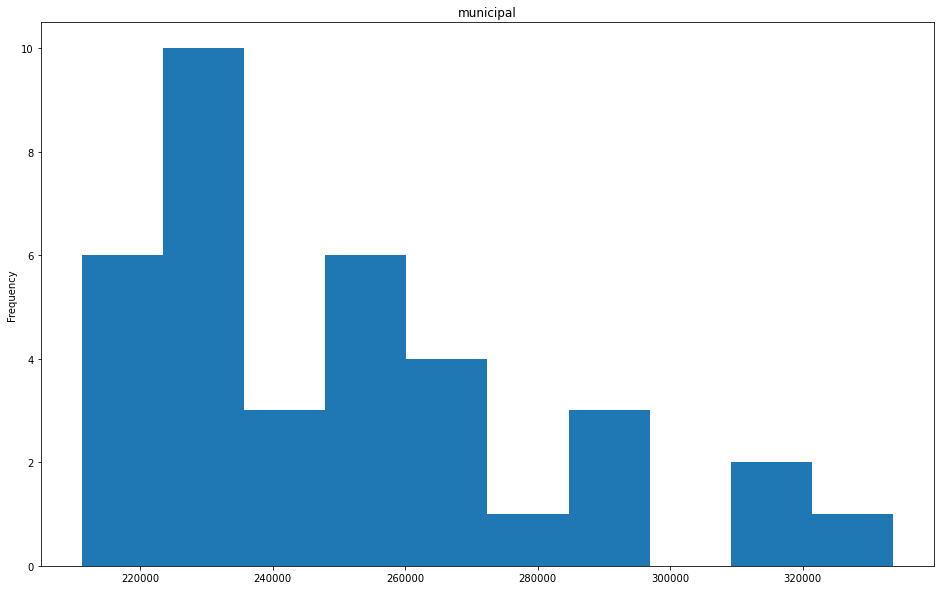

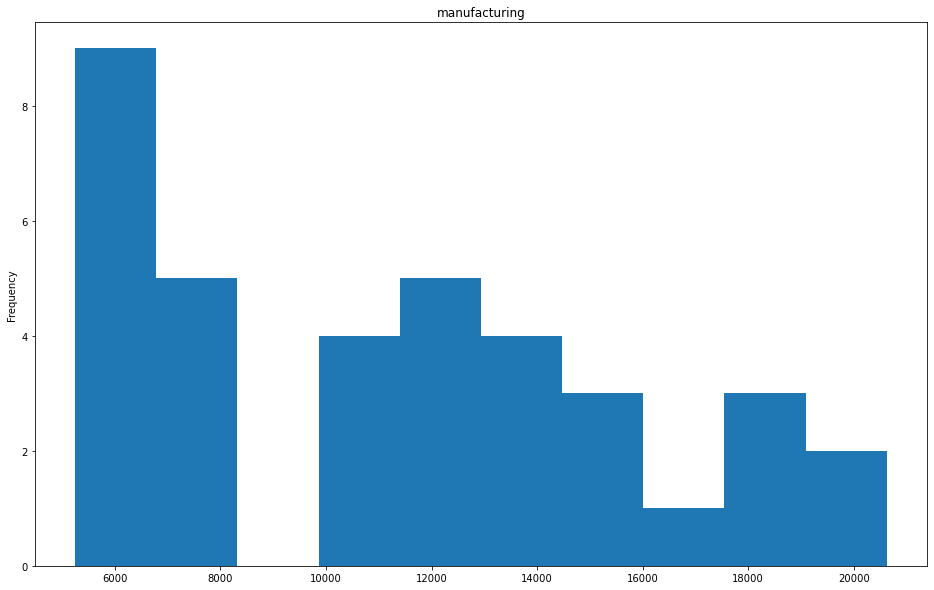

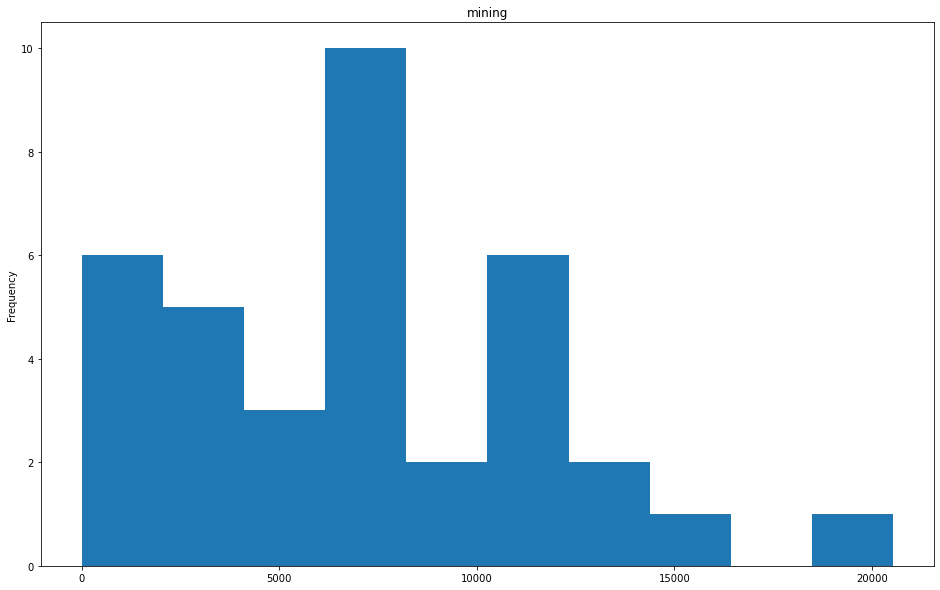

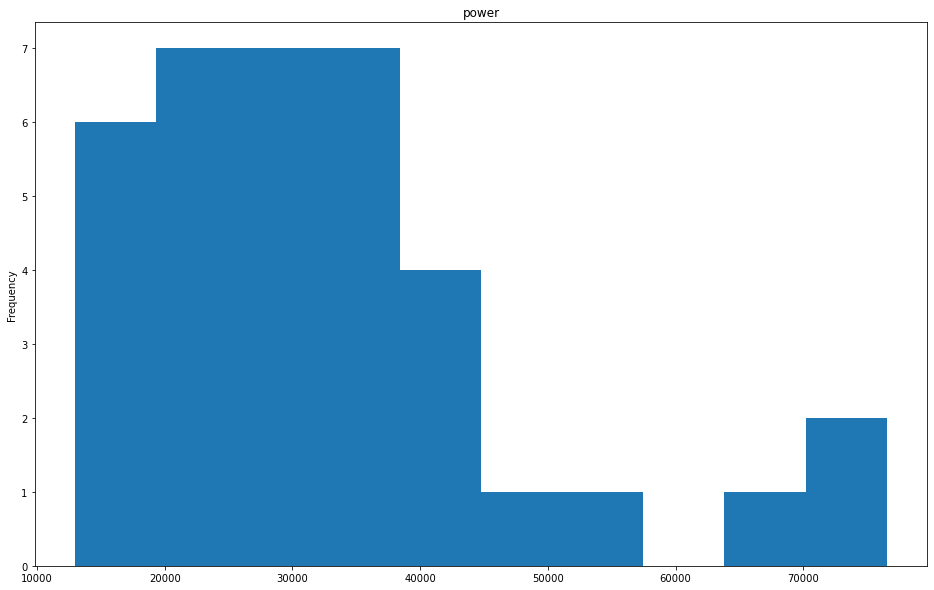

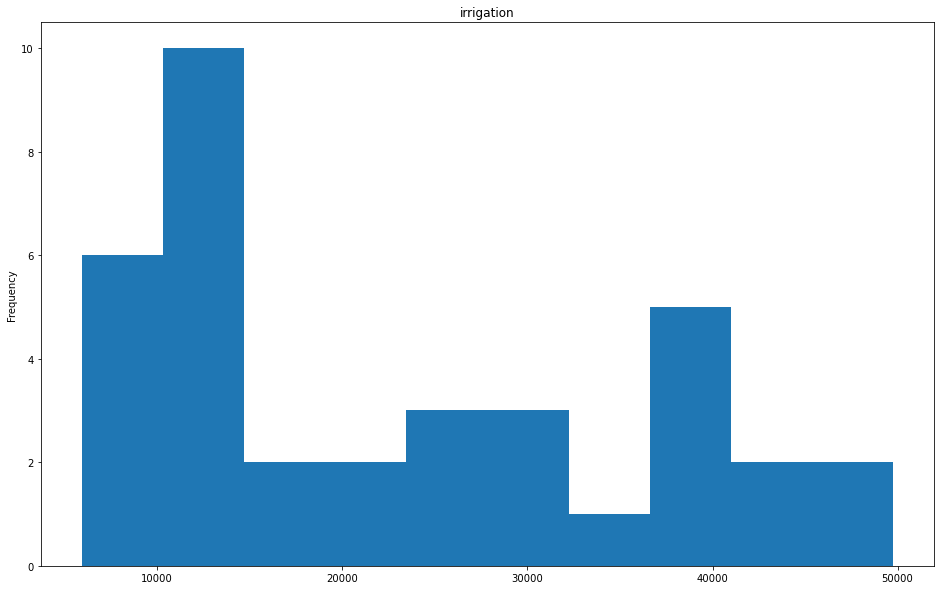

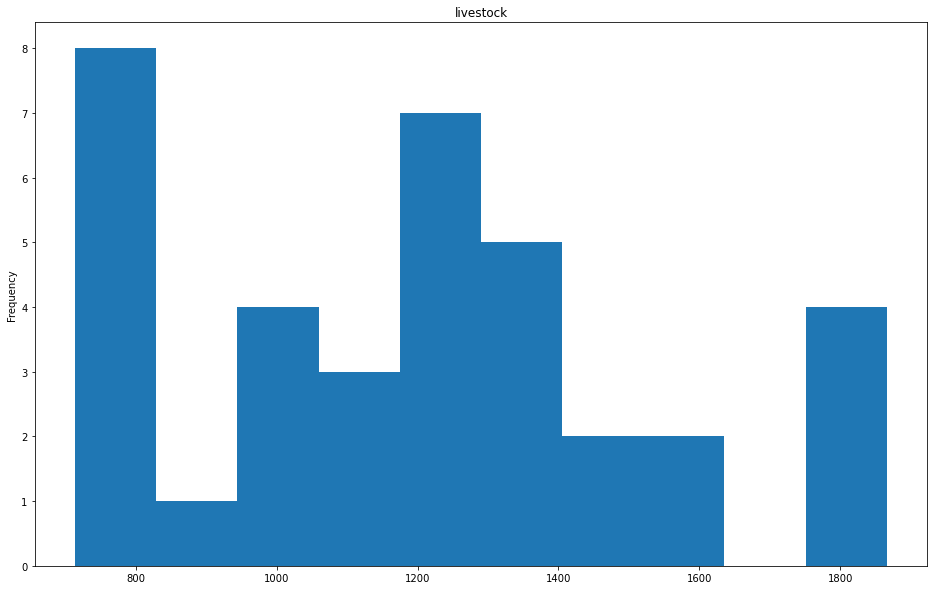

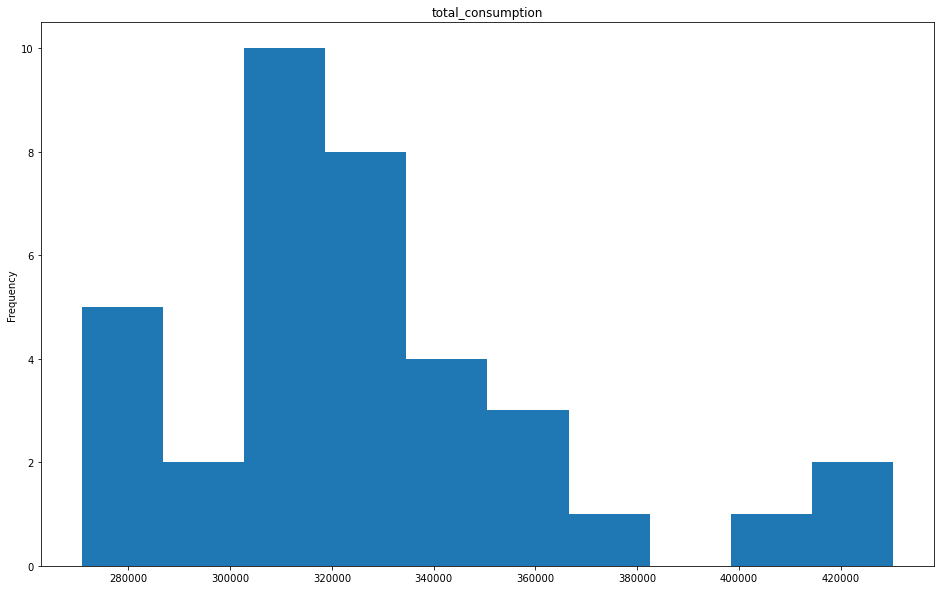

In [26]:
# Setting a list of columns I want to visualize from usage
usage_cols = ['municipal','manufacturing', 'mining', 'power', 'irrigation', 'livestock', 'total_consumption']

for col in usage_cols:
    usage[col].plot(kind='hist')
    plt.title(col)
    plt.show()

In [28]:
usage[usage_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
municipal,36.0,250906.444444,30734.155561,211173.0,229670.00,242693.0,265376.00,333637.0
manufacturing,36.0,11299.222222,4541.183937,5247.0,7031.25,11348.5,14247.75,20627.0
mining,36.0,7010.777778,4609.781254,0.0,3456.75,6629.5,10459.00,20533.0
power,36.0,32698.361111,15185.368347,12987.0,23236.50,27318.5,37744.25,76538.0
irrigation,36.0,23291.361111,13301.226906,5910.0,11868.50,20463.5,35494.00,49761.0
livestock,36.0,1211.250000,339.210544,714.0,958.75,1219.5,1389.25,1866.0
total_consumption,36.0,326417.416667,37879.967373,270765.0,304393.25,319857.5,340853.50,430351.0


# Lineplots
Since this is all historical date driven data, Lineplots would probably tell a better story here.

<AxesSubplot:xlabel='date'>

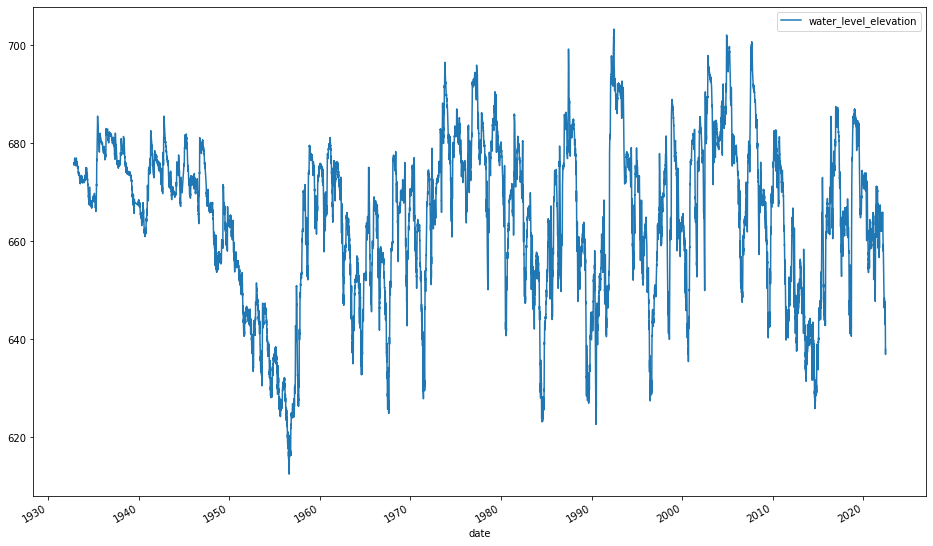

In [29]:
# Visualizing Aquifer level over time
aquifer.plot()

<AxesSubplot:xlabel='date'>

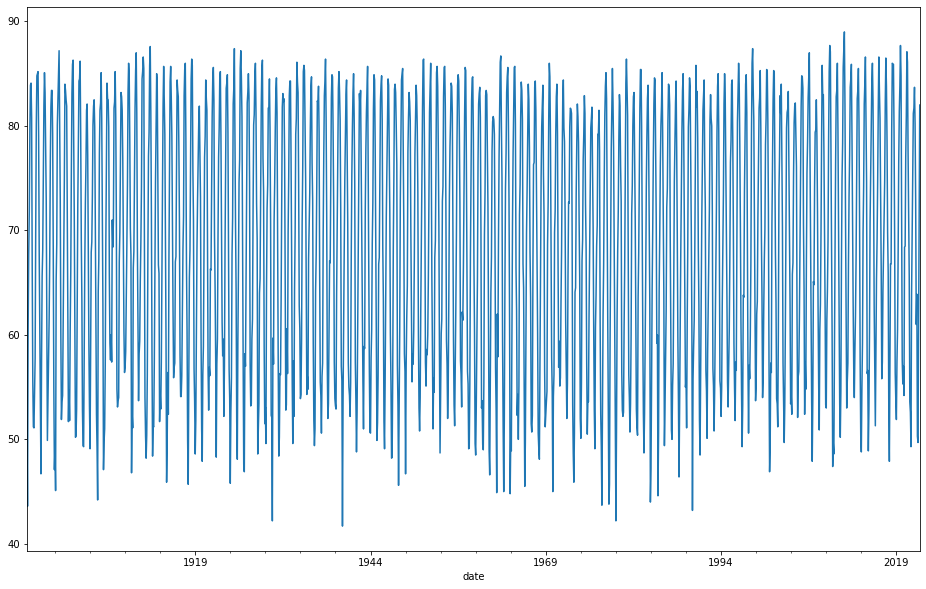

In [31]:
# Visualizing average monthly temperature over time
weather.avg_monthly_temp.plot()

<AxesSubplot:xlabel='date'>

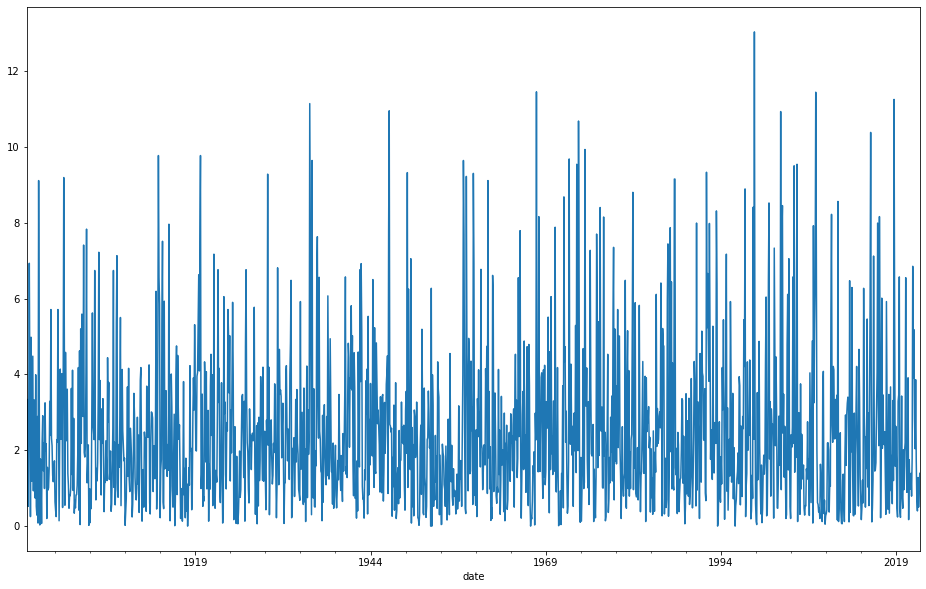

In [32]:
# Visualizing total monthly precipitation over time
weather.total_monthly_precip.plot()

<AxesSubplot:xlabel='date'>

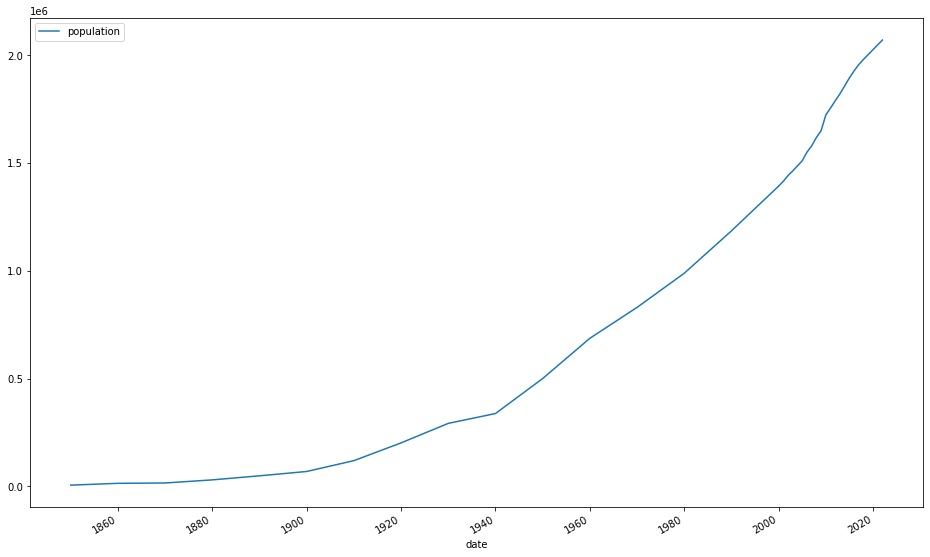

In [33]:
# Visualizing population over time
pop.plot()

<AxesSubplot:xlabel='date'>

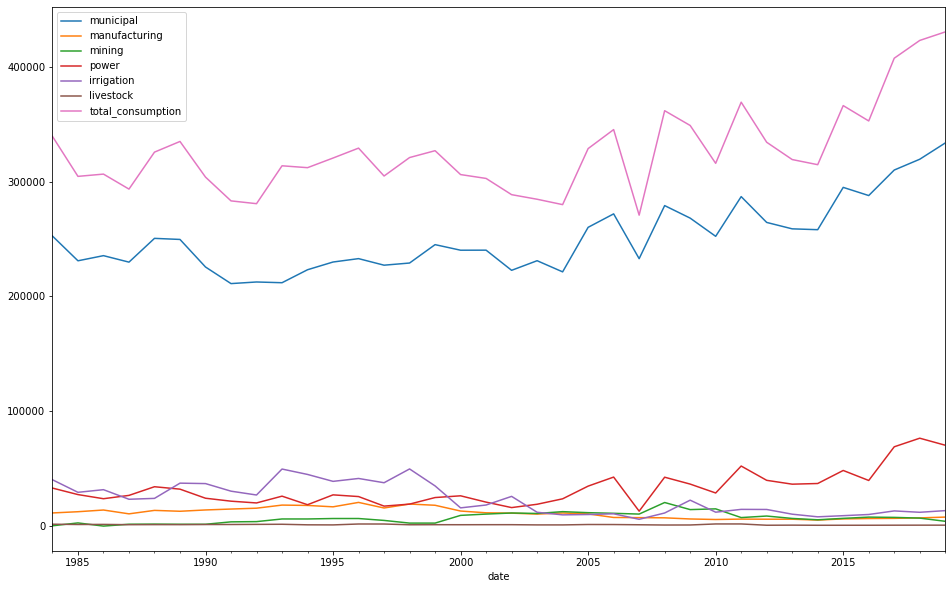

In [34]:
# Visualizing water usage over time
usage[usage_cols].plot()

I want to resample and interpolate the population data so I can use it later to compare with aquifer data.

In [66]:
resampled_pop = pop.resample('D').mean().interpolate(method='polynomial', order=2).astype('int64')

resampled_pop

,population
date,
1850-01-01,6052
1850-01-02,6055
1850-01-03,6059
1850-01-04,6063
1850-01-05,6066
...,...
2021-12-28,2070414
2021-12-29,2070475
2021-12-30,2070537


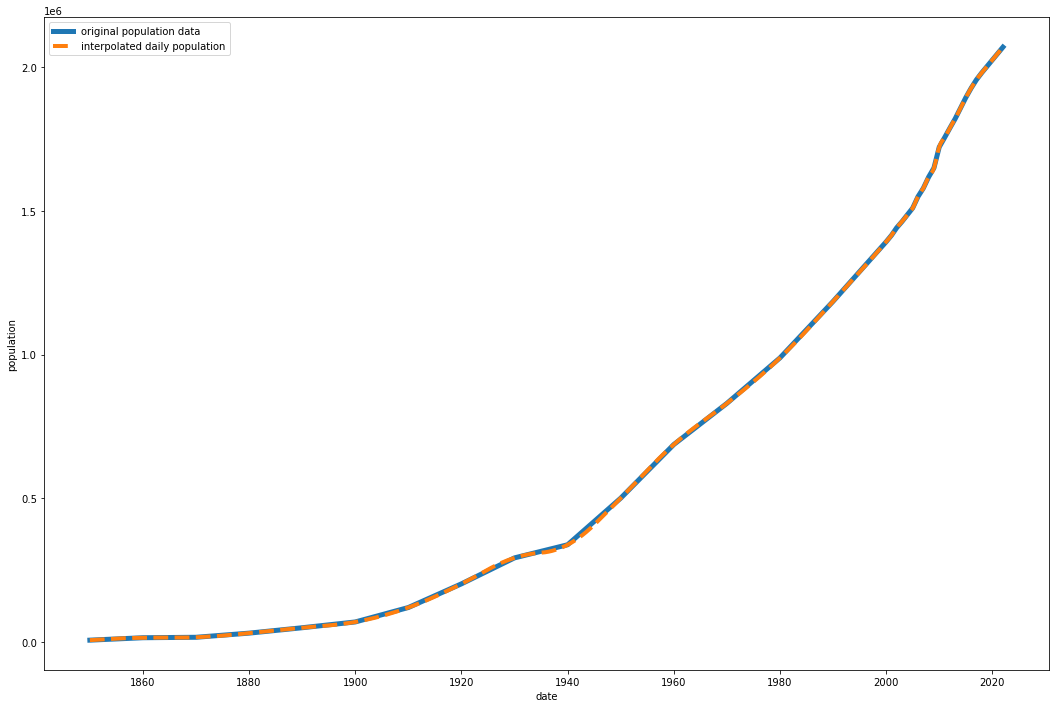

In [84]:
#Visualizing the original population line vs the interpolated daily population
plt.figure(figsize=(18,12))
sns.lineplot(data = pop, y = 'population', x='date', label = 'original population data', lw=5)
sns.lineplot(data = resampled_pop, y = 'population', x ='date', label = 'interpolated daily population',ls ='--', lw=4)
plt.legend()
plt.show()

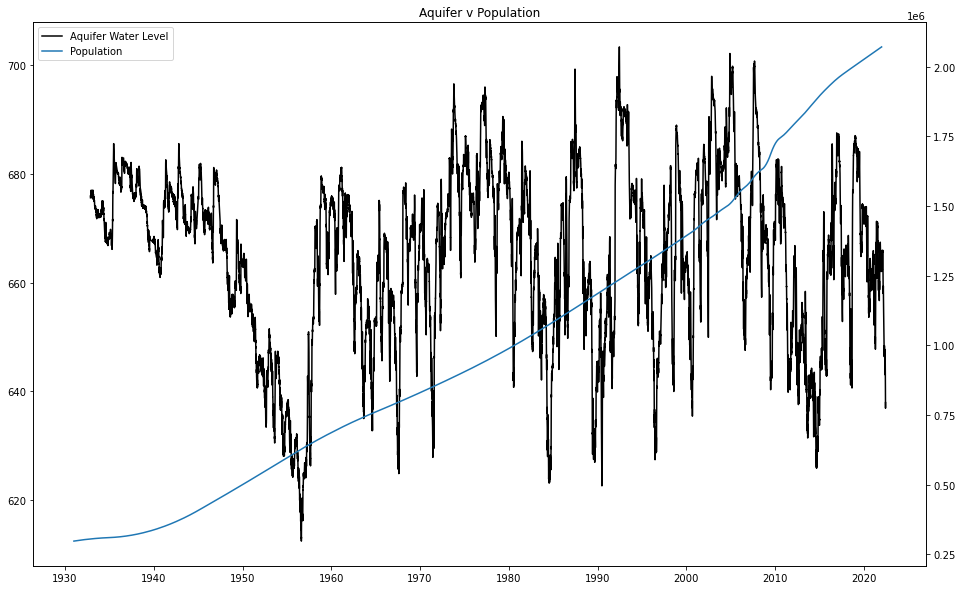

In [144]:
# plotting population values with Aquifer water levels to see if there is any specific relationship visually apparent

ax1 = plt.subplot()
l1, = ax1.plot(aquifer, color='black')
ax2 = ax1.twinx()
l2, = ax2.plot(resampled_pop[resampled_pop.index.year > 1930])

plt.legend([l1, l2], ["Aquifer Water Level", "Population"])
plt.title('Aquifer v Population')

plt.show()

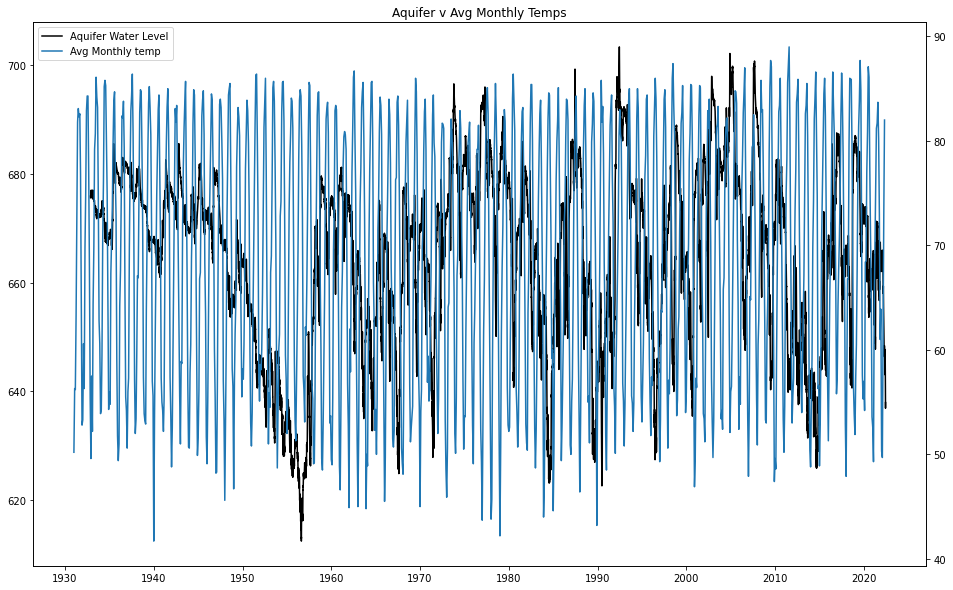

In [145]:
# plotting temperature values with Aquifer water levels to see if there is any specific relationship visually apparent
ax1 = plt.subplot()
l1, = ax1.plot(aquifer, color='black')
ax2 = ax1.twinx()
l2, = ax2.plot(weather[weather.index.year > 1930].avg_monthly_temp)

plt.legend([l1, l2], ["Aquifer Water Level", "Avg Monthly temp"])
plt.title('Aquifer v Avg Monthly Temps')
plt.show()

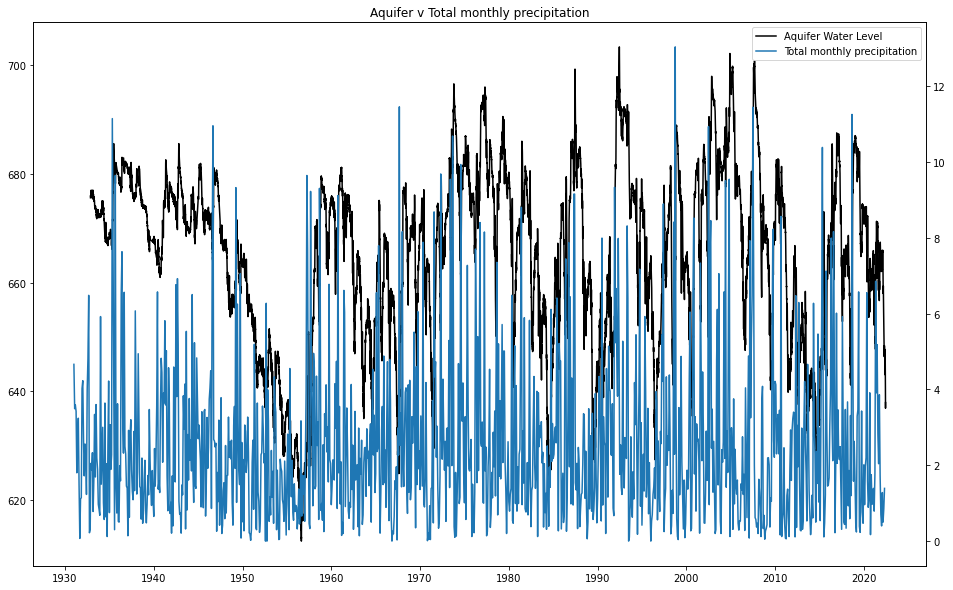

In [149]:
# plotting precipitation values with Aquifer water levels to see if there is any specific relationship visually apparent
ax1 = plt.subplot()
l1, = ax1.plot(aquifer, color='black')
ax2 = ax1.twinx()
l2, = ax2.plot(weather[weather.index.year > 1930].total_monthly_precip)

plt.legend([l1, l2], ["Aquifer Water Level", "Total monthly precipitation"])
plt.title('Aquifer v Total monthly precipitation')
plt.show()


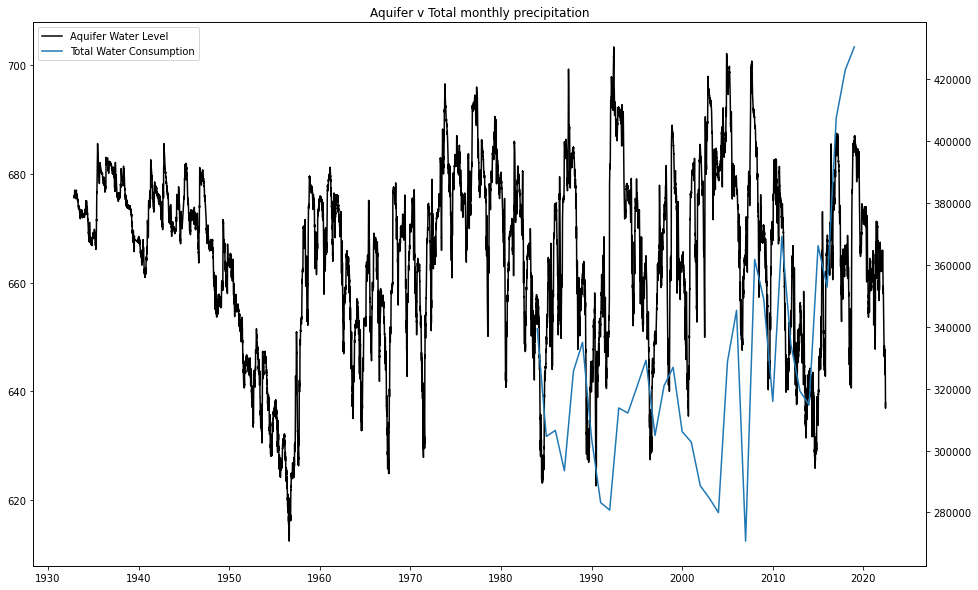

In [150]:
# plotting total water consumption values with Aquifer water levels to see if there is any specific relationship visually apparent
ax1 = plt.subplot()
l1, = ax1.plot(aquifer, color='black')
ax2 = ax1.twinx()
l2, = ax2.plot(usage[usage.index.year > 1930].total_consumption)

plt.legend([l1, l2], ["Aquifer Water Level", "Total Water Consumption"])
plt.title('Aquifer v Total monthly precipitation')
plt.show()


It's hard to tell from these messy graphs, so I am going to resample by 6 months to see if it helps make any more sense.

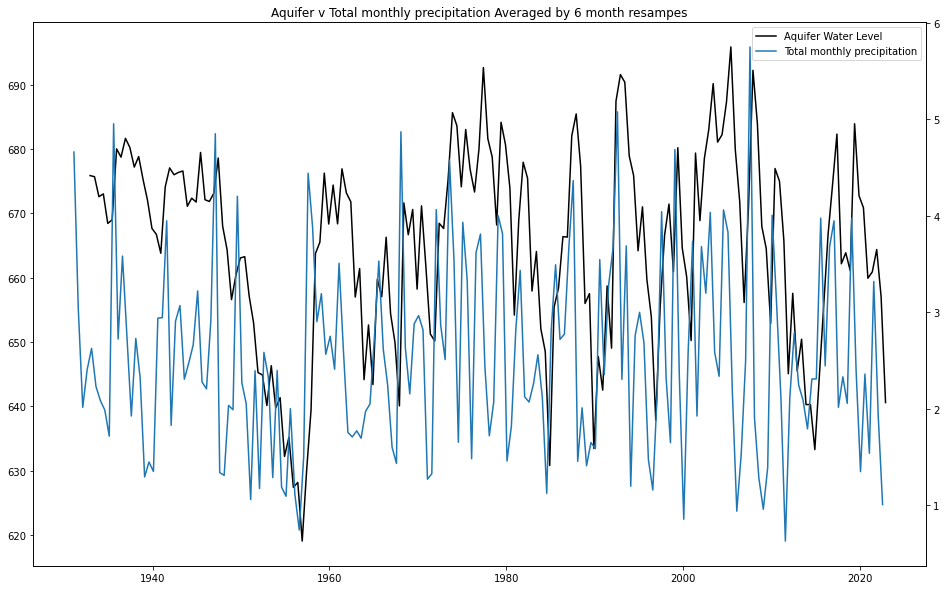

In [155]:
# plotting precipitation values with Aquifer water levels to see if there is any specific relationship visually apparent, resampled
# to six months
ax1 = plt.subplot()
l1, = ax1.plot(aquifer.resample('6M').mean(), color='black')
ax2 = ax1.twinx()
l2, = ax2.plot(weather[weather.index.year > 1930].total_monthly_precip.resample('6M').mean())

plt.legend([l1, l2], ["Aquifer Water Level", "Total monthly precipitation"])
plt.title('Aquifer v Total monthly precipitation Averaged by 6 month resamples')
plt.show()


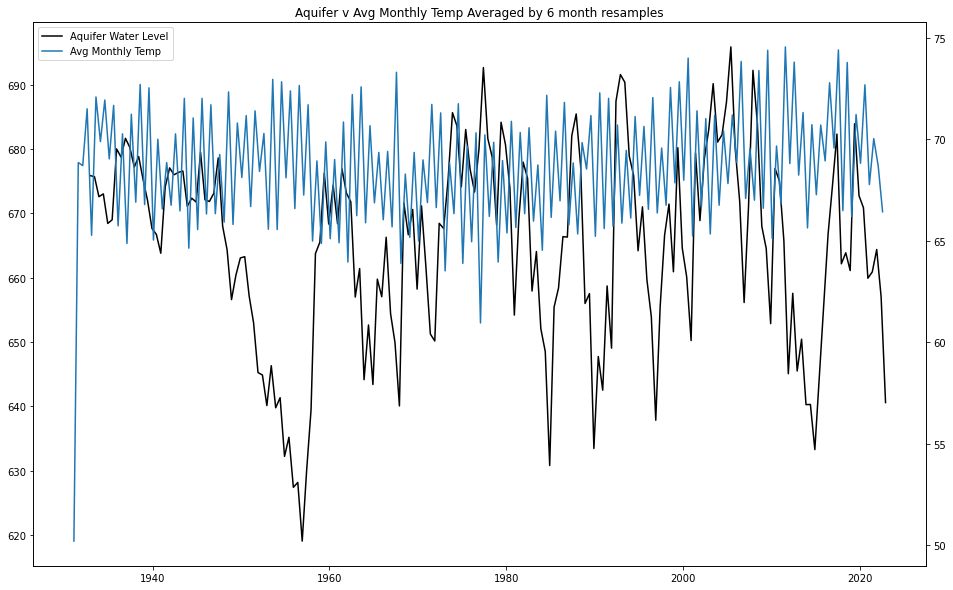

In [158]:
# plotting temperature values with Aquifer water levels to see if there is any specific relationship visually apparent, resampled
# to six months
ax1 = plt.subplot()
l1, = ax1.plot(aquifer.resample('6M').mean(), color='black')
ax2 = ax1.twinx()
l2, = ax2.plot(weather[weather.index.year > 1930].avg_monthly_temp.resample('6M').mean())

plt.legend([l1, l2], ["Aquifer Water Level", "Avg Monthly Temp"])
plt.title('Aquifer v Avg Monthly Temp Averaged by 6 month resamples')
plt.show()


A pattern has seemingly emerged indicating that precipitation and Aquifer Water Level are linked. This isn't suprising.

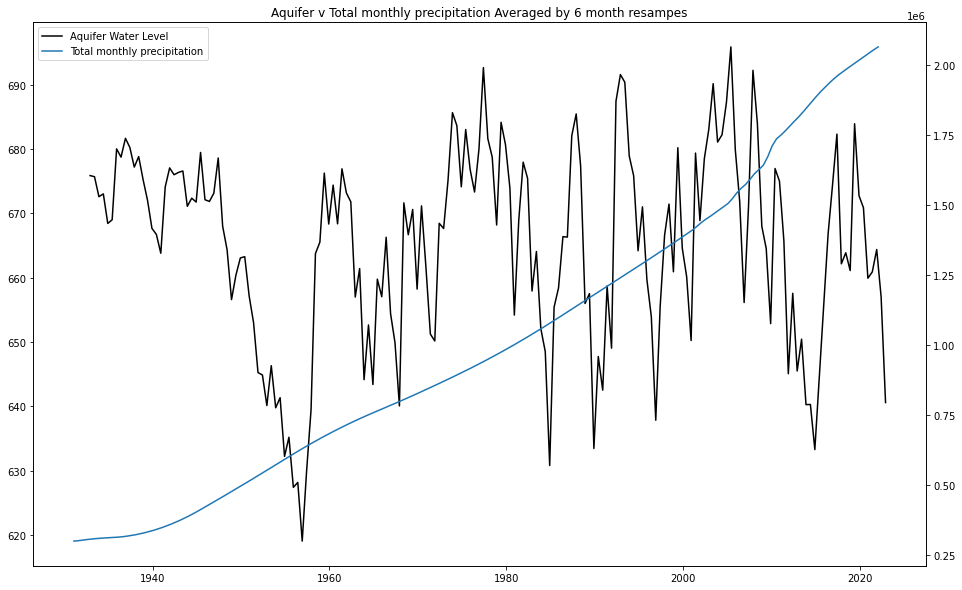

In [157]:
# plotting population values with Aquifer water levels to see if there is any specific relationship visually apparent; resampled
# to 6 months
ax1 = plt.subplot()
l1, = ax1.plot(aquifer.resample('6M').mean(), color='black')
ax2 = ax1.twinx()
l2, = ax2.plot(resampled_pop[resampled_pop.index.year > 1930].resample('6M').mean())

plt.legend([l1, l2], ["Aquifer Water Level", "Population"])
plt.title('Aquifer v Population Averaged by 6 month resamples')
plt.show()


Population still doesn't look that correlated, I want to explore total consumption now.

In [162]:
# I need to resample and interpolate for the water usage.
resampled_total_consumption = usage.total_consumption.resample('D').mean().interpolate(method='polynomial', order=2).astype('int64')

resampled_total_consumption


date
1984-01-01    339376
1984-01-02    339215
1984-01-03    339055
1984-01-04    338896
1984-01-05    338736
               ...  
2018-12-28    430263
2018-12-29    430285
2018-12-30    430307
2018-12-31    430329
2019-01-01    430351
Freq: D, Name: total_consumption, Length: 12785, dtype: int64

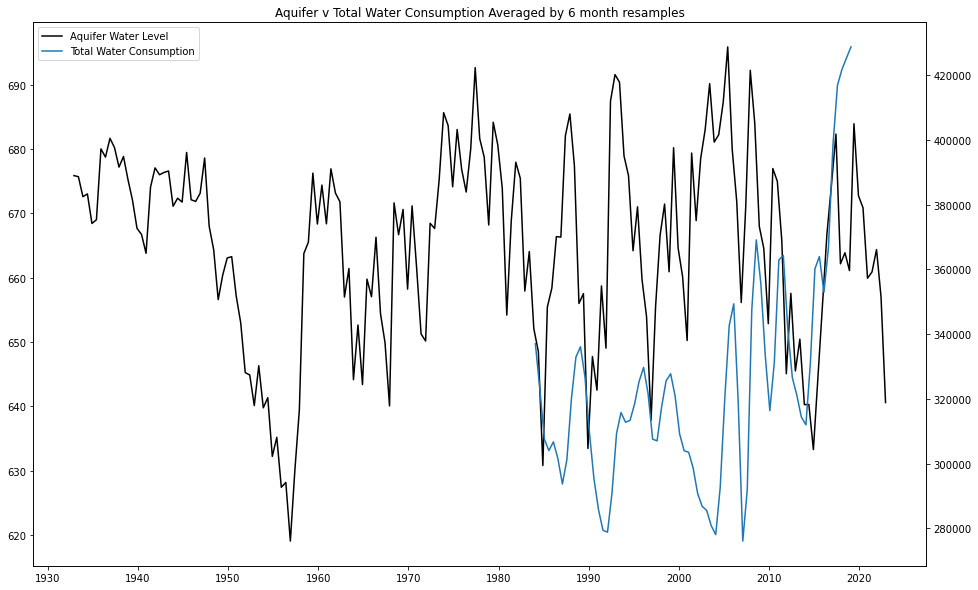

In [164]:
# plotting water consumption values with Aquifer water levels to see if there is any specific relationship visually apparent; resampled
# to 6 months
ax1 = plt.subplot()
l1, = ax1.plot(aquifer.resample('6M').mean(), color='black')
ax2 = ax1.twinx()
l2, = ax2.plot(resampled_total_consumption.resample('6M').mean())

plt.legend([l1, l2], ["Aquifer Water Level", "Total Water Consumption"])
plt.title('Aquifer v Total Water Consumption Averaged by 6 month resamples')
plt.show()


Althought I only have data for total water consumption since 1984, it looks as though there may be a link between water usage and aquifer level. Again, this makes sense. Higher consumption seems to preceed drops in water level; though it is somewhat laggy and inexact.

## Bivariate comparisons
In order to to bivariate data comparisons, I have to put all the data together into one dataframe and then interpolate to make sure I have values for all points. 

In [172]:
all_df = aquifer.copy()

In [188]:
all_df['temp'] = (weather.avg_monthly_temp.resample('D').mean()).interpolate(method='polynomial',order =2)
all_df['precipitation'] = (weather.total_monthly_precip.resample('D').mean()/30).interpolate(method='polynomial', order=2)
all_df['total_water_consumption'] = usage.total_consumption.resample('D').mean().interpolate(method='polynomial', order=2).astype('int64')
all_df['population'] = resampled_pop

In [207]:
all_df.head()

,water_level_elevation,temp,precipitation,total_water_consumption,population
count,31919.000000,31877.000000,31877.000000,12774.000000,3.175700e+04
mean,664.944913,68.711598,0.084552,324609.885157,1.035345e+06
std,16.189777,12.125184,0.068910,34828.416449,5.060169e+05
min,612.510000,41.659100,-0.027225,270607.000000,3.056340e+05
25%,654.250000,57.311413,0.035382,303608.000000,6.264680e+05
50%,667.670000,69.590807,0.068806,317222.500000,9.609680e+05
75%,676.570000,80.360726,0.112493,336852.750000,1.398522e+06
max,703.310000,89.171157,0.436672,430351.000000,2.070660e+06


<AxesSubplot:xlabel='date', ylabel='water_level_elevation'>

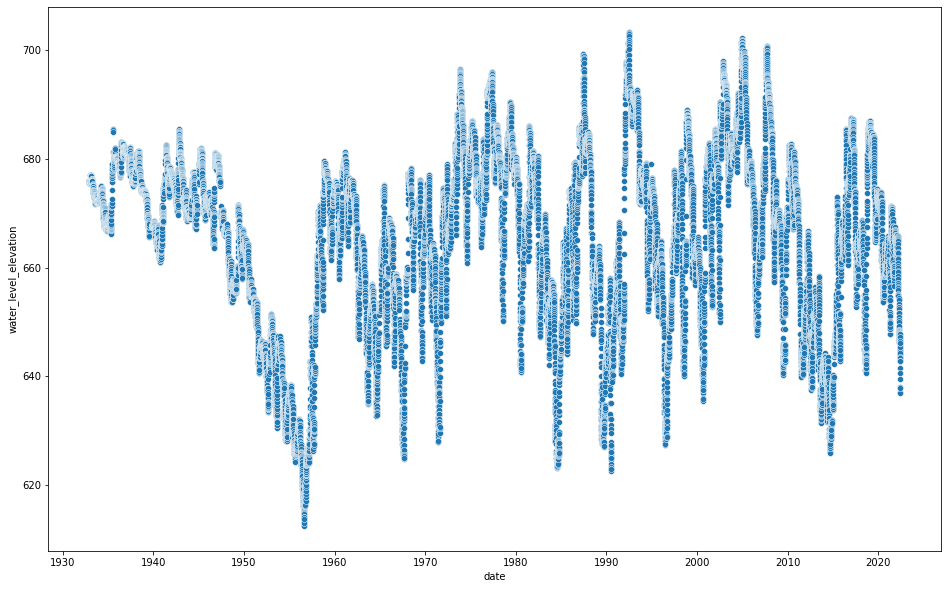

In [239]:
sns.scatterplot(data = all_df, y='water_level_elevation', x ='date')

<AxesSubplot:xlabel='population', ylabel='water_level_elevation'>

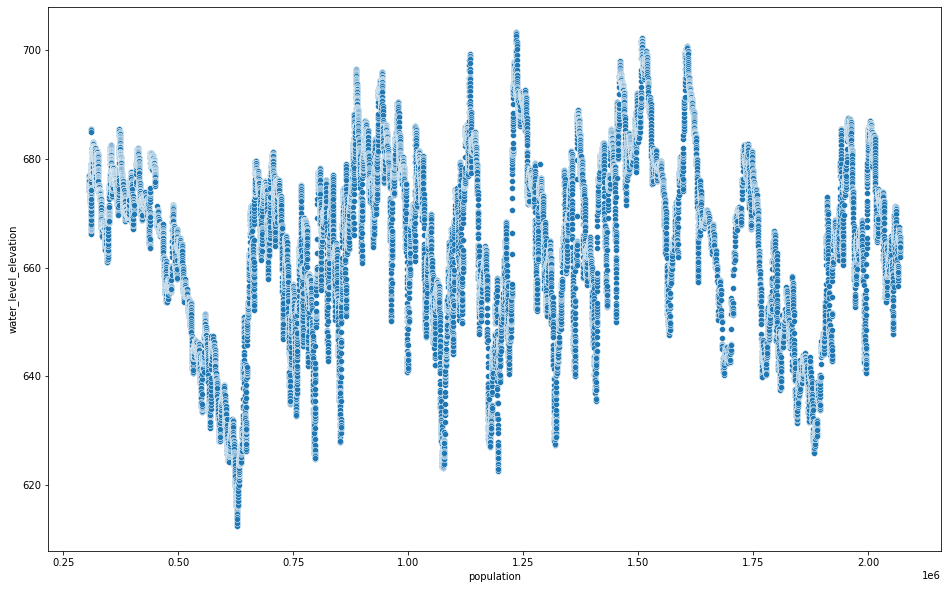

In [238]:
sns.scatterplot(data = all_df, y='water_level_elevation', x ='population')

<AxesSubplot:xlabel='precipitation', ylabel='water_level_elevation'>

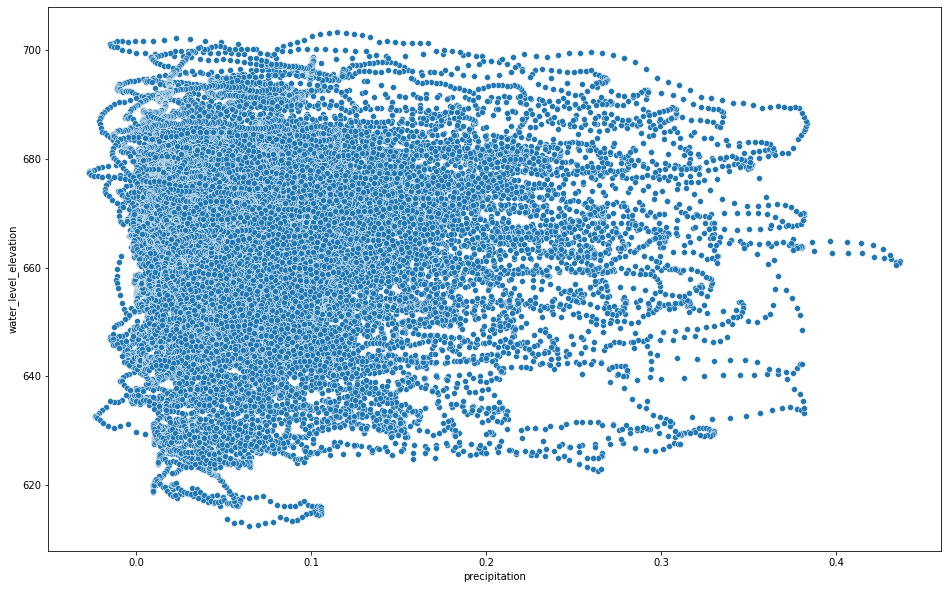

In [237]:
sns.scatterplot(data = all_df, y='water_level_elevation', x ='precipitation')

<AxesSubplot:xlabel='total_water_consumption', ylabel='temp'>

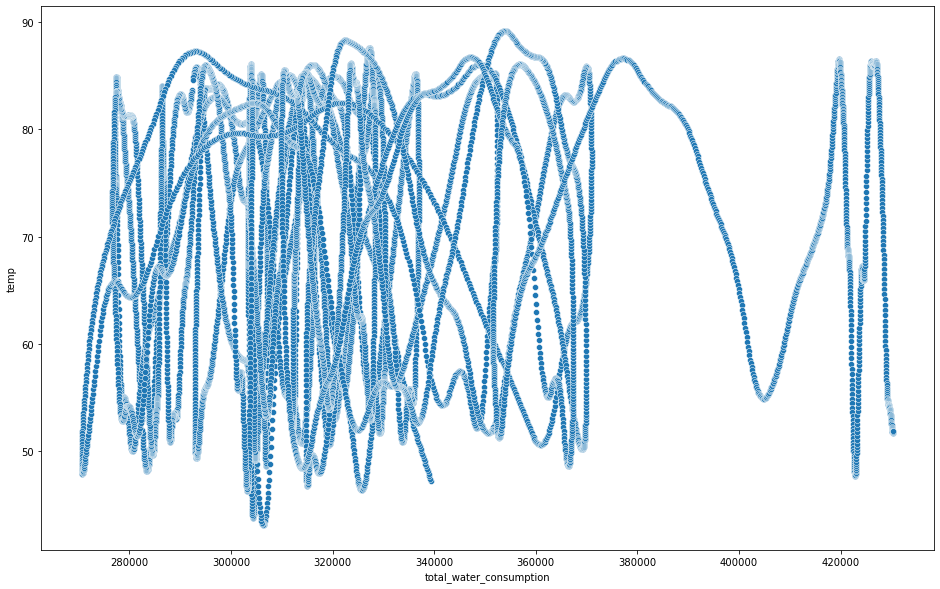

In [234]:
sns.scatterplot(data = all_df[(all_df.index.year >1983) & (all_df.index.year < 2019)], y='temp', x ='total_water_consumption')